## Análisis Exploratorio 

https://www.kaggle.com/datasets/simonaasm/world-happiness-index-by-reports-2013-2023

El Informe Mundial de la Felicidad (World Happiness Report) es una publicación de Sustainable Development Solutions Network, impulsada por los datos de la Encuesta Mundial de Gallup. El informe revisa el estado de felicidad en 156 países de todo el mundo. Las otras columnas estiman en qué medida cada uno de los factores Economy (PBI per capita), Family (apoyo social), Health (esperanza de vida), Freedom (libertad), Generosity(generosidad), Corruption (ausencia de corrupción) y Job Satisfaction (satisfacción laboral), contribuyen a elevar las evaluaciones de vida en cada país en comparación con Dystopia, un país hipotético que tiene valores iguales a los promedios nacionales más bajos del mundo para cada uno de los seis factores. Estos factores no tienen impacto en la puntuación total de felicidad informada para cada país, pero explican por qué algunos países se clasifican más alto que otros.

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [82]:
df = pd.read_csv("datasets/World Happiness Report.csv")

In [83]:
df.head(10)

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe
5,Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,93.8,Western Europe
6,Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,90.5,North America
7,New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,88.6,Asia-Pacific
8,Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,92.7,Western Europe
9,Australia,10,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,89.2,Asia-Pacific


In [84]:
print("El dataset de World Happiness Report tiene", df.shape[0], "de filas y", df.shape[1], "columnas")

El dataset de World Happiness Report tiene 153 de filas y 12 columnas


#### Variables del dataset

In [85]:
df.dtypes

Country              object
Happiness Rank        int64
Happiness Score     float64
Economy             float64
Family              float64
Health              float64
Freedom             float64
Generosity          float64
Corruption          float64
Dystopia            float64
Job Satisfaction    float64
Region               object
dtype: object

#### Valores Nulos del dataset

In [86]:
df.isna().sum()

Country             0
Happiness Rank      0
Happiness Score     0
Economy             0
Family              0
Health              0
Freedom             0
Generosity          0
Corruption          0
Dystopia            0
Job Satisfaction    2
Region              0
dtype: int64

##### Reemplazar los datos nulos
Ver si la variable Job Satisfaction tiene muchos outliers y posteriormente reemplazar los valores nulos por la media o mediana según sea el caso. 


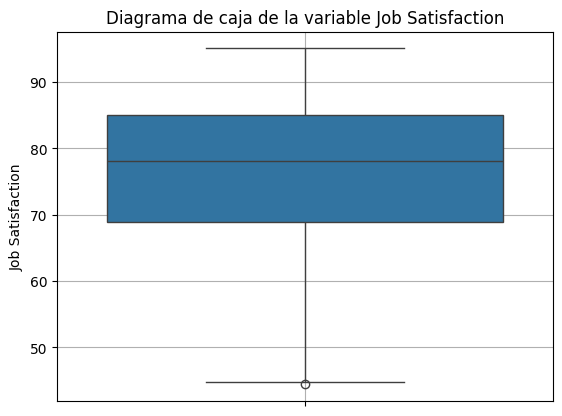

In [87]:
sns.boxplot(data=df, y='Job Satisfaction') 
plt.title("Diagrama de caja de la variable Job Satisfaction", loc="center") 
plt.ylabel("Job Satisfaction")
plt.grid()
plt.show()

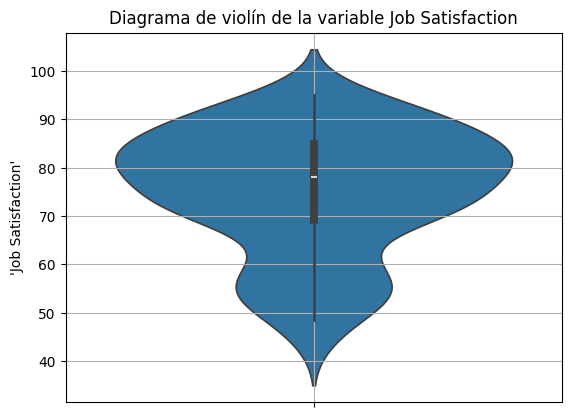

In [104]:
sns.violinplot(data=df, y='Job Satisfaction') 
plt.title("Diagrama de violín de la variable Job Satisfaction", loc="center") 
plt.ylabel("Job Satisfaction")
plt.grid()
plt.show()

In [89]:
#Calcular Outliers
Q1 = df['Job Satisfaction'].quantile(0.25) 
Q3 = df['Job Satisfaction'].quantile(0.75)
iqr = Q3 - Q1
umbral_superior = Q3 + 1.5 * iqr
umbral_inferior = Q1 - 1.5 * iqr
print("Un valor de Job Satisfaction por debajo de : ",umbral_inferior, " es un outlier")
print("Un valor de Job Satisfaction por arriba de : ",umbral_superior, " es un outlier")

Un valor de Job Satisfaction por debajo de :  44.72499999999998  es un outlier
Un valor de Job Satisfaction por arriba de :  109.325  es un outlier


In [90]:
outliers = df[(df['Job Satisfaction'] > umbral_superior) | (df['Job Satisfaction'] < umbral_inferior)]
print("La columna Job Satisfaction tiene", len(df["Job Satisfaction"]), "valores, de los cuales solo", len(outliers), "es considerado como outlier." )

La columna Job Satisfaction tiene 153 valores, de los cuales solo 1 es considerado como outlier.


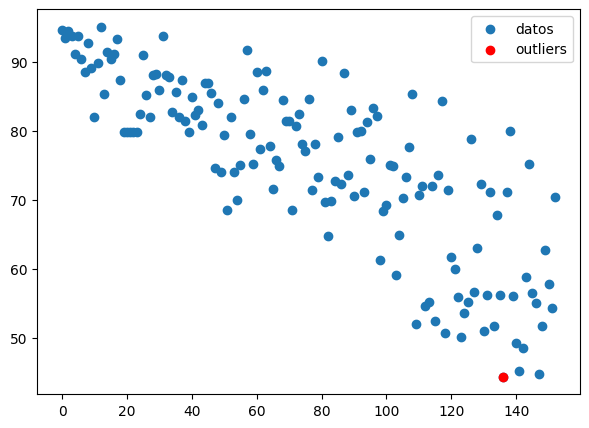

In [188]:
#Graficar Outliers
plt.scatter(df.index,df["Job Satisfaction"], label='datos')
plt.scatter(outliers.index,outliers["Job Satisfaction"], color='red', label='outliers')
plt.legend()
plt.show()

#### Al no haber muchos outliers, reemplazamos valores nulos por la media de la variable.

In [91]:
df['Job Satisfaction'].fillna(df['Job Satisfaction'].mean(), inplace=True) #reemplazas los valores nulos por la media
df.isna().sum() 

Country             0
Happiness Rank      0
Happiness Score     0
Economy             0
Family              0
Health              0
Freedom             0
Generosity          0
Corruption          0
Dystopia            0
Job Satisfaction    0
Region              0
dtype: int64

#### Medidas de Tendencia Central y de Posición

In [92]:
df.describe()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,78.169935,5.349281,0.982433,1.186630,0.550117,0.408489,0.245324,0.123179,1.853072,75.209934
std,45.008741,1.134997,0.421901,0.288441,0.237769,0.150744,0.134395,0.102133,0.499490,12.876804
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,44.400000
25%,40.000000,4.497000,0.659517,1.041990,0.364509,0.300741,0.153075,0.057070,1.597970,69.300000
50%,78.000000,5.279000,1.064578,1.251826,0.606042,0.437454,0.231503,0.089848,1.832910,78.100000
75%,117.000000,6.098000,1.315175,1.416404,0.719217,0.518631,0.322228,0.153066,2.150801,85.000000
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


#### Matriz de Correlación

<Axes: >

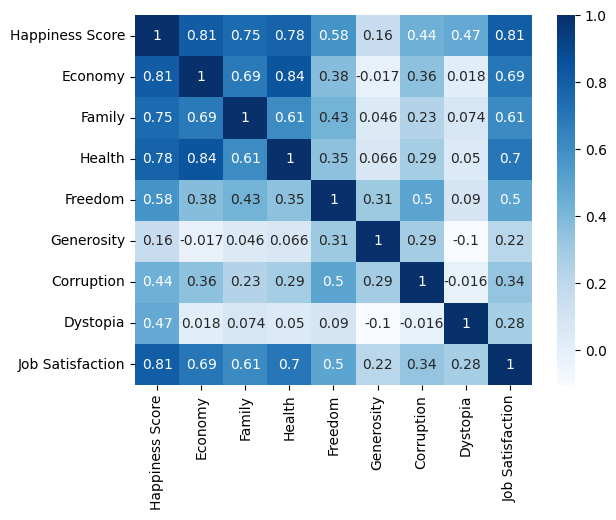

In [93]:
df.drop(columns=['Happiness Rank'],inplace=True) # eliminar la columna "Hapiness Rank" del df
corrmat = df.corr(numeric_only=True)
sns.heatmap(corrmat, annot=True, cmap='Blues')

- Hay una alta correlación postiva entre el índice de felicidad de un país y su desempeño económico (Economy), el apoyo social que reciben sus habitantes (Family), su esperanza de vida (Health) y la satisfacción laboral de sus habitantes (Job Satisfaction).
- Por otro lado, hay una correlación positiva moderada entre el índice de felicidad de cada país y la percepción de libertad (Freedom) y de ausencia de corrupción (Corruption) de sus habitantes.
- Por ultimo, existe una coreralación positiva baja entre el índice de felicidad de un país y la generosidad (Generosity) de sus habitantes.

#### Ver las variables con la mayor correlación con 'Happiness Score'

In [177]:
def bestCoefficients(corr, k):
    # Obtener las columnas con mayor correlación con 'Happiness Rank'
    cols = corr.nlargest(k, 'Happiness Score')['Happiness Score'].index

    # Calcular la matriz de correlación entre las columnas seleccionadas
    cm = np.corrcoef(df[cols].values.T)  # Las variables deben estar en columnas y observaciones en filas
    
    # Visualizar la matriz de correlación usando un mapa de calor
    sns.heatmap(cm, annot=True, cmap='Blues', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

    # Devolver las columnas seleccionadas
    return cols

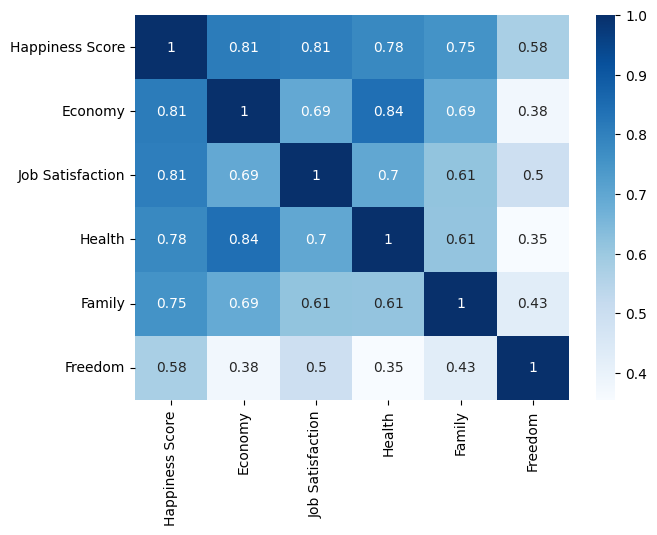

In [185]:
cols = bestCoefficients(corrmat,6)

In [179]:
print("Las 5 variables con mayor correlación con Hapiness Score son: ", cols[1:6])

Las 5 variables con mayor correlación con Hapiness Score son:  Index(['Economy', 'Job Satisfaction', 'Health', 'Family', 'Freedom'], dtype='object')


### Análisis Gráfico de las 5 variables con mayor correlación con 'Happiness Score'
#### Distribución de los datos
- Asimetría: Indica si los datos están sesgados hacia la derecha o hacia la izquierda respecto a la media.
    - == 0 la distribución es perfectamente simétrica
    - Si es > 0 la distribución es asimétria hacia la derecha
    - Si es < 0 la distribución es asimétrica hacia izquierda
- Curtosis: Mide la distribución de los datos y la concentración en las colas en comparación con una distribución normal
    - K=0: Distribución Normal (mesocúrtica)
    - K>0: Distribución leptocúrtica (colas más pesadas y un pico pornunciado)
    - K<0: Distribución platicúrtica (colas más ligeras y un pico menos pronunciado)

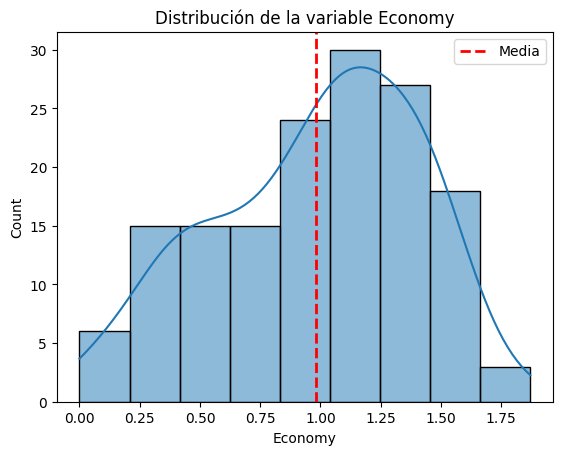

In [106]:
sns.histplot(data=df,x='Economy', kde=True)
plt.axvline(df["Economy"].mean(), color='red', linestyle='--', label='Media',linewidth=2)
plt.legend()
plt.title("Distribución de la variable Economy")
plt.show()

In [107]:
print("Skewness (asimetria)",df['Economy'].skew())
print("Kurtosis (curtosis)", df['Economy'].kurt())

Skewness (asimetria) -0.3842690837927635
Kurtosis (curtosis) -0.6877592578838474


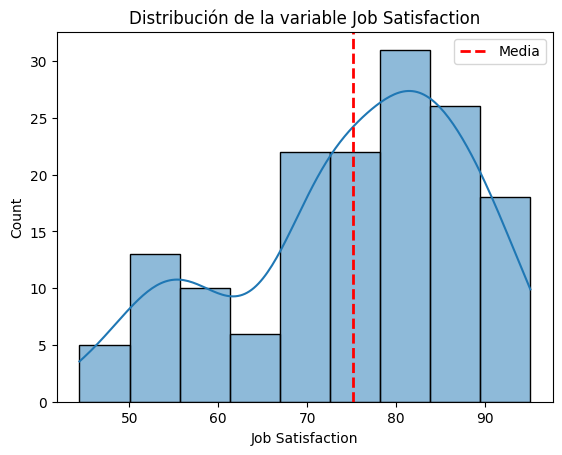

In [108]:
sns.histplot(data=df,x='Job Satisfaction', kde=True)
plt.axvline(df['Job Satisfaction'].mean(), color='red', linestyle='--', label='Media',linewidth=2)
plt.legend()
plt.title("Distribución de la variable Job Satisfaction")
plt.show()

In [109]:
print("Skewness (asimetria)",df['Job Satisfaction'].skew())
print("Kurtosis (curtosis)", df['Job Satisfaction'].kurt())

Skewness (asimetria) -0.6178289983409867
Kurtosis (curtosis) -0.5162655819691975


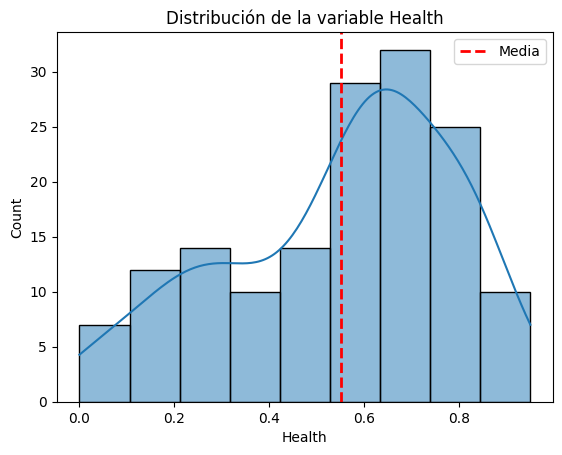

In [110]:
sns.histplot(data=df,x='Health', kde=True)
plt.axvline(df['Health'].mean(), color='red', linestyle='--', label='Media',linewidth=2)
plt.legend()
plt.title("Distribución de la variable Health")
plt.show()

In [111]:
print("Skewness (asimetria)",df['Health'].skew())
print("Kurtosis (curtosis)", df['Health'].kurt())

Skewness (asimetria) -0.5719030584872957
Kurtosis (curtosis) -0.6014299638826963


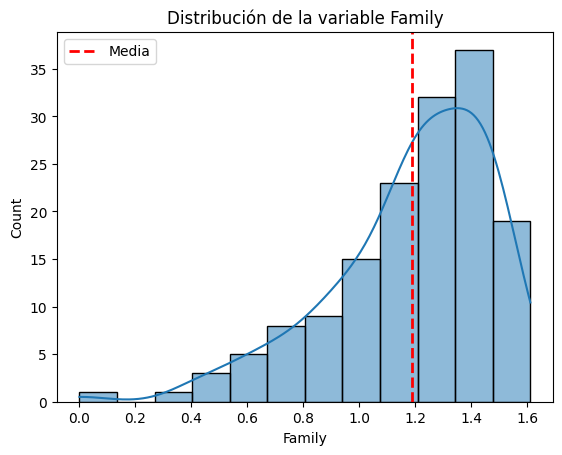

In [112]:
sns.histplot(data=df,x='Family', kde=True)
plt.axvline(df['Family'].mean(), color='red', linestyle='--', label='Media',linewidth=2)
plt.legend()
plt.title("Distribución de la variable Family")
plt.show()

In [113]:
print("Skewness (asimetria)",df['Family'].skew())
print("Kurtosis (curtosis)", df['Family'].kurt())

Skewness (asimetria) -1.1613869896018176
Kurtosis (curtosis) 1.4818272909155632


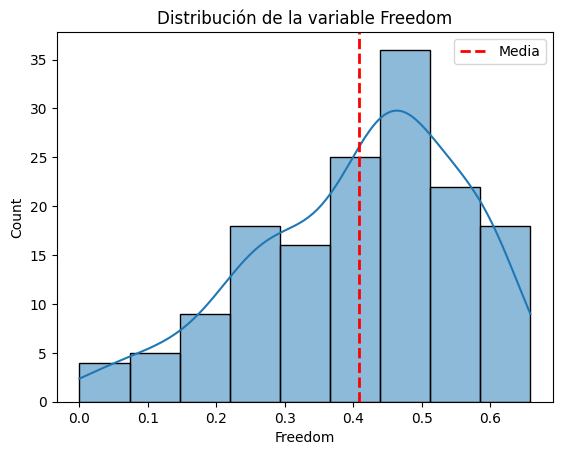

In [114]:
sns.histplot(data=df,x='Freedom', kde=True)
plt.axvline(df['Freedom'].mean(), color='red', linestyle='--', label='Media',linewidth=2)
plt.legend()
plt.title("Distribución de la variable Freedom")
plt.show()

In [115]:
print("Skewness (asimetria)",df['Freedom'].skew())
print("Kurtosis (curtosis)", df['Freedom'].kurt())

Skewness (asimetria) -0.6101040658835563
Kurtosis (curtosis) -0.23306394839825595


#### Gráfico de dispersión de las 5 variables con más correlación con Happiness Score

In [133]:
top_5 = cols[1:6].tolist()
type(top_5)

list

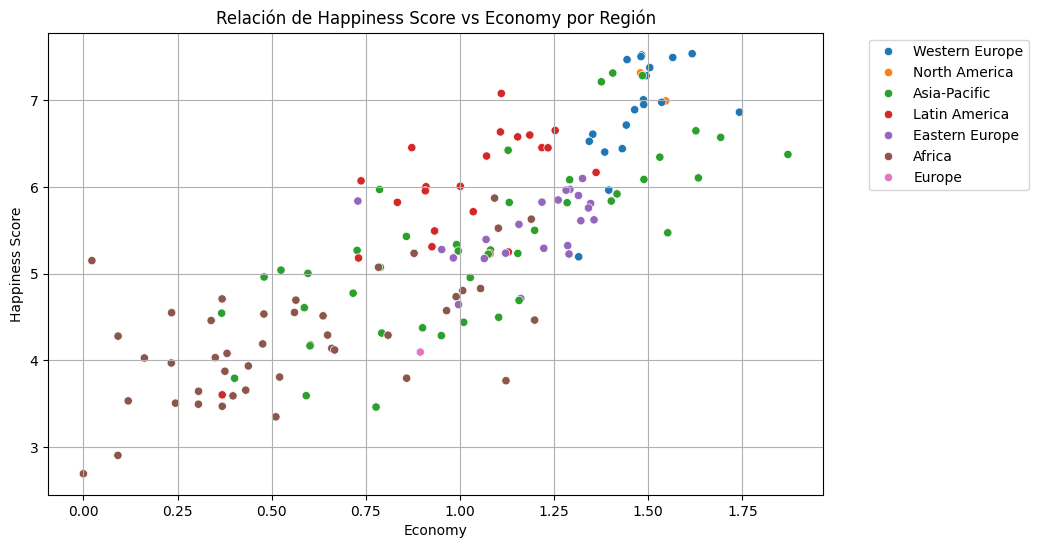

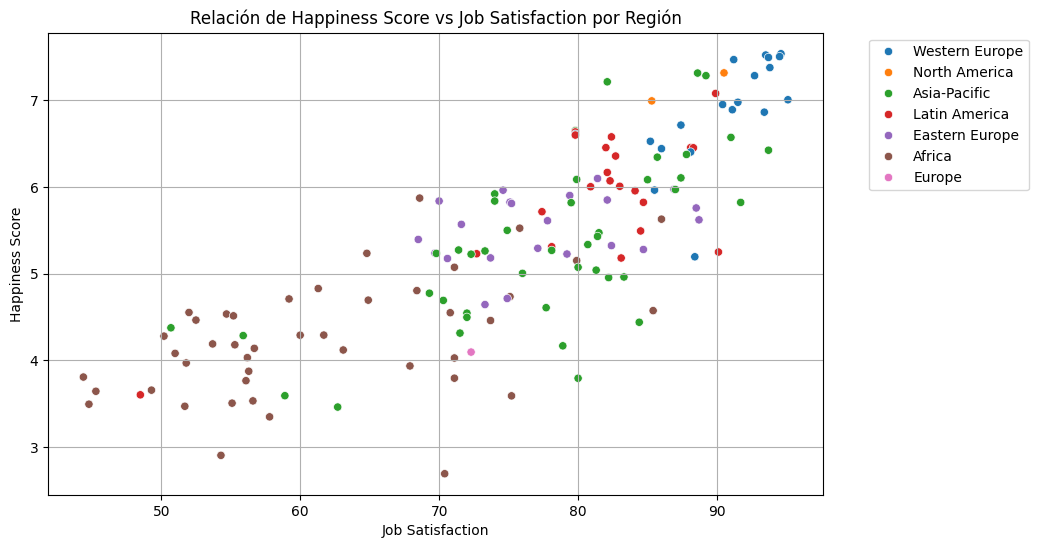

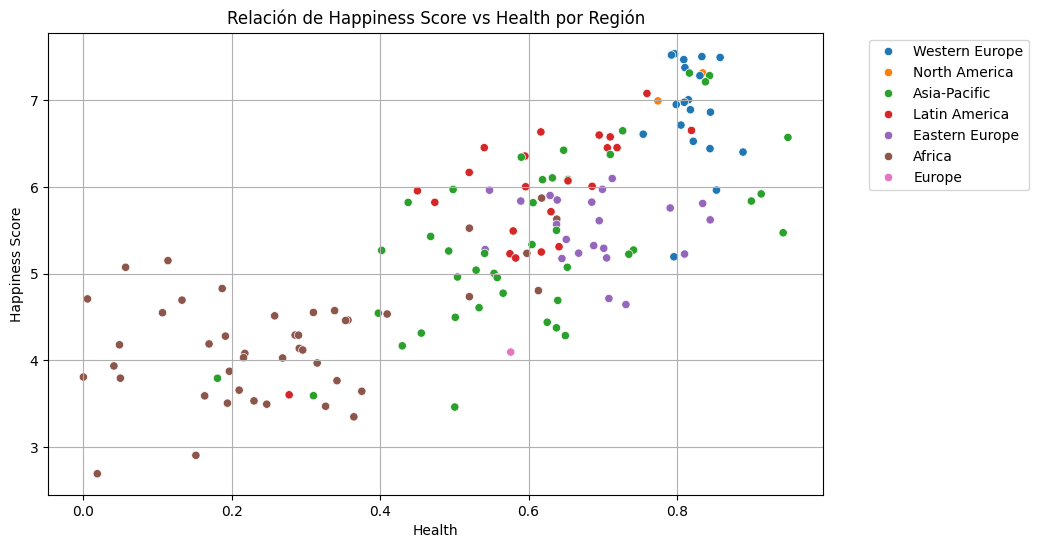

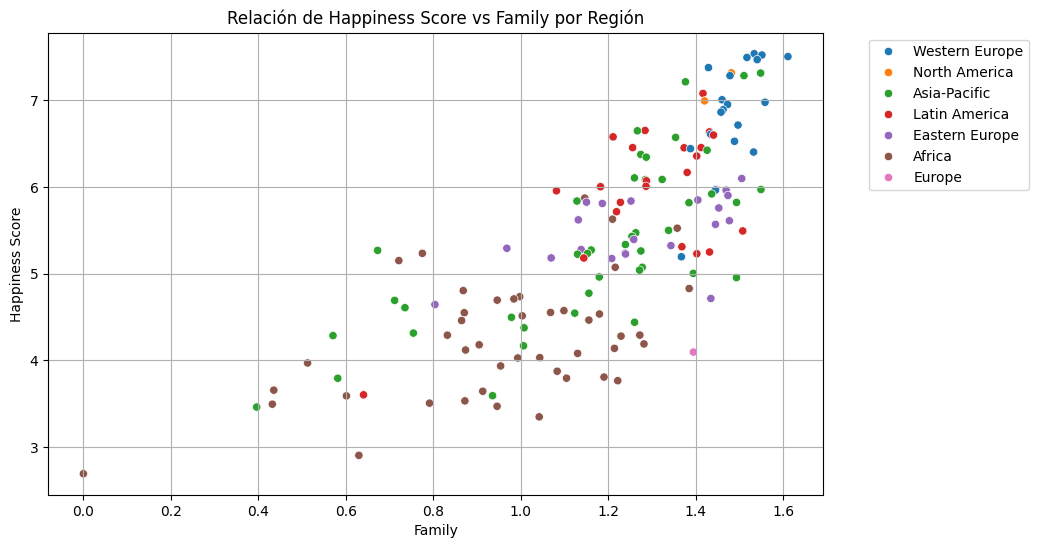

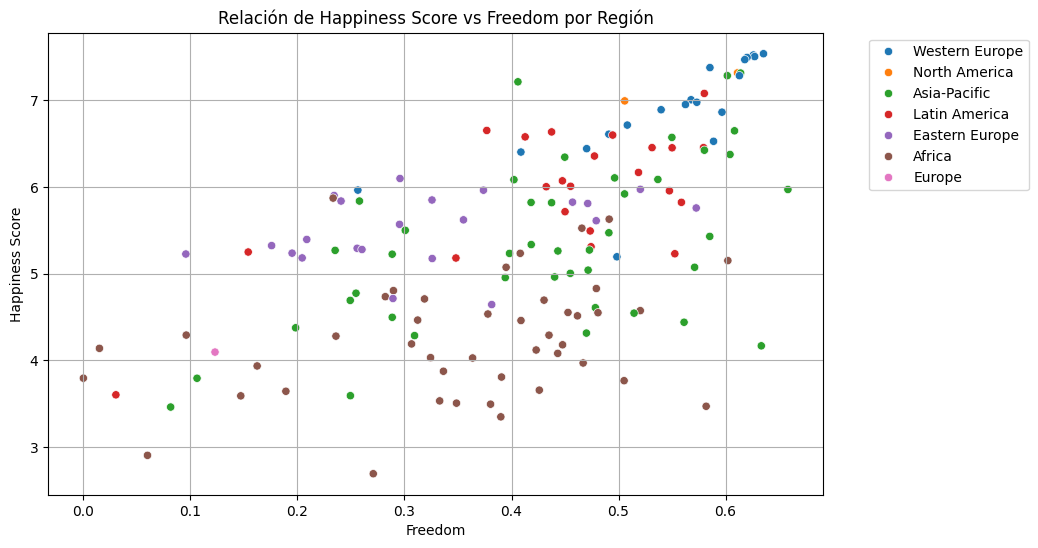

In [194]:
top_5 = cols[1:6]
# Crea un gráfico de dispersión para cada par de variables
for column in top_5:
    sns.scatterplot(data=df, x=column, y='Happiness Score', hue="Region")
    plt.title(f'Relación de Happiness Score vs {column} por Región')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.show()


<br><br>

### Hipótesis
- Los países que experimentan un buen desempeño económico, altos niveles de satisfacción laboral y una mayor esperanza de vida tienden a exhibir índices de felicidad más elevados.

### Regresión Lineal Múltiple


In [195]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [196]:
model = LinearRegression()

In [221]:
# Separo entre features y variable objetivo
x = df[["Economy", "Job Satisfaction", "Health"]] #features (VIs)
y = df['Happiness Score'] # Variable objetivo (VD)
print(x)

      Economy  Job Satisfaction    Health
0    1.616463              94.6  0.796667
1    1.482383              93.5  0.792566
2    1.480633              94.5  0.833552
3    1.564980              93.7  0.858131
4    1.443572              91.2  0.809158
..        ...               ...       ...
148  0.368746              51.7  0.326425
149  0.777153              62.7  0.500533
150  0.511136              57.8  0.364509
151  0.091623              54.3  0.151611
152  0.000000              70.4  0.018773

[153 rows x 3 columns]


In [222]:
model.fit(x,y) #Entrenar el modelo

LinearRegression()

In [223]:
y_pred = model.predict(x) 

### Resultados del modelo

In [224]:
from sklearn.metrics import r2_score, mean_squared_error
# Coeficientes de la regresión lineal
coefficients = model.coef_

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y, y_pred)

# Intercepto de la regresión lineal
intercept = model.intercept_

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y, y_pred)


print(f'Coeficiente de Determinación (R^2): {r2}')
print(f'Error Cuadrático Medio (MSE): {mse}')
print("Coeficientes:", coefficients)
print("IConstante:", intercept)

Coeficiente de Determinación (R^2): 0.7795408470289227
Error Cuadrático Medio (MSE): 0.282143442064441
Coeficientes: [0.98793777 0.03808814 0.81569138]
IConstante: 1.0653656866101366


#### Tabla de resultados (con statsmodels)

In [208]:
import statsmodels.api as sm

In [225]:
# Crear un modelo de statsmodels con la misma data
X_statsmodels = sm.add_constant(X)
model_sm = sm.OLS(y, X_statsmodels).fit()

In [226]:
coefficients_statsmodels = model_sm.params
print("Coeficientes del modelo:")
print(coefficients_statsmodels)

Coeficientes del modelo:
const               1.065366
Economy             0.987938
Job Satisfaction    0.038088
Health              0.815691
dtype: float64


In [227]:
summary_table = model_sm.summary()
print(summary_table)

                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     175.6
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           1.04e-48
Time:                        19:36:10   Log-Likelihood:                -120.30
No. Observations:                 153   AIC:                             248.6
Df Residuals:                     149   BIC:                             260.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.0654      0.283  

## Conclusión
Con un coeficiente de determinación (R^2) de 0.78, el modelo parece respaldar la hipótesis. El desempeño económico, la expectativa de vida y la satisfacción laboral de cada país logran explicar un 78% de la variación del índice de felicidad. Aunque otras variables como la libertad, el apoyo social o la ausencia de corrupción podrían mejorar aún más el modelo, las tres variables seleccionadas parecerían ser las principales impulsoras del rendimiento de los países en el índice de felicidad.